In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df_small = df.sample(100, random_state=42)

In [ ]:
df_small.shape

(100, 2)

<Axes: >

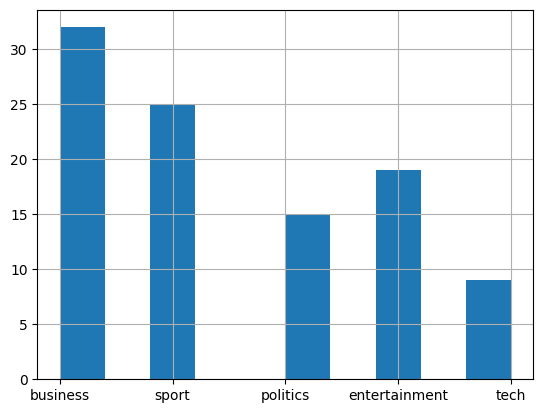

In [ ]:
df_small['labels'].hist()

In [ ]:
# Install the OpenAI package
!pip install openai

# Import the OpenAI package
import openai

# Set your API key
openai.api_key = #insert key



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
text = df_small['text'].iloc[0]
text

'UK house prices dip in November\n\nUK house prices dipped slightly in November, the Office of the Deputy Prime Minister (ODPM) has said.\n\nThe average house price fell marginally to £180,226, from £180,444 in October. Recent evidence has suggested that the UK housing market is slowing after interest rate increases, and economists forecast a drop in prices during 2005. But while the monthly figures may hint at a cooling of the market, annual house price inflation is still strong, up 13.8% in the year to November. Economists, however, forecast that ODPM figures are likely to show a weakening in annual house price growth in coming months. "Overall, the housing market activity is slowing down and that is backed up by the mortgage lending and the mortgage approvals data," said Mark Miller, at HBOS Treasury Services. "The ODPM data is a fairly lagging indicator."\n\nThe figures come after the Bank of England said the number of mortgages approved in the UK has fallen to the lowest level for

In [ ]:
text = text.replace("\n", " ")

In [ ]:
emb = openai.embeddings.create(
    input=[text],
    model='text-embedding-3-small'
)
emb

CreateEmbeddingResponse(data=[Embedding(embedding=[0.02553490176796913, 0.044962670654058456, 0.05403486266732216, 0.005581610836088657, -0.012103632092475891, 0.03389902040362358, -0.015190389938652515, 0.010759398341178894, 0.025822555646300316, 0.010792589746415615, 0.05297274887561798, -0.0165733452886343, -0.08656198531389236, -0.0006316652288660407, 0.022204743698239326, 0.04066997393965721, 0.008779005147516727, 0.04390055686235428, -0.05045023933053017, 0.038390859961509705, -0.011970868334174156, -0.014803161844611168, -0.0636381059885025, -0.01998095028102398, 0.020157968625426292, -0.017226101830601692, 0.00714158546179533, -0.060186248272657394, 0.014084025286138058, 0.0002734795561991632, 0.026619138196110725, -0.017093338072299957, 0.06748826056718826, 0.010676421225070953, -0.025225119665265083, -0.01954946666955948, -0.02568979188799858, 0.01694951020181179, 0.03383263945579529, -0.032527126371860504, 0.010908757336437702, -0.0005929424078203738, -0.004682689439505339, 

In [ ]:
emb.data[0].embedding

[0.02553490176796913,
 0.044962670654058456,
 0.05403486266732216,
 0.005581610836088657,
 -0.012103632092475891,
 0.03389902040362358,
 -0.015190389938652515,
 0.010759398341178894,
 0.025822555646300316,
 0.010792589746415615,
 0.05297274887561798,
 -0.0165733452886343,
 -0.08656198531389236,
 -0.0006316652288660407,
 0.022204743698239326,
 0.04066997393965721,
 0.008779005147516727,
 0.04390055686235428,
 -0.05045023933053017,
 0.038390859961509705,
 -0.011970868334174156,
 -0.014803161844611168,
 -0.0636381059885025,
 -0.01998095028102398,
 0.020157968625426292,
 -0.017226101830601692,
 0.00714158546179533,
 -0.060186248272657394,
 0.014084025286138058,
 0.0002734795561991632,
 0.026619138196110725,
 -0.017093338072299957,
 0.06748826056718826,
 0.010676421225070953,
 -0.025225119665265083,
 -0.01954946666955948,
 -0.02568979188799858,
 0.01694951020181179,
 0.03383263945579529,
 -0.032527126371860504,
 0.010908757336437702,
 -0.0005929424078203738,
 -0.004682689439505339,
 0.00231

In [ ]:
df_small.head()

,text,labels
414,UK house prices dip in November\n\nUK house pr...,business
420,LSE 'sets date for takeover deal'\n\nThe Londo...,business
1644,Harinordoquy suffers France axe\n\nNumber eigh...,sport
416,Barclays shares up on merger talk\n\nShares in...,business
1232,Campaign 'cold calls' questioned\n\nLabour and...,politics


In [ ]:
model_name = 'text-embedding-3-small'

In [ ]:
def get_embedding(text):
    text = text.replace("\n", " ")
    emb = openai.embeddings.create(
        input=[text],
        model = model_name,
    )
    return emb.data[0].embedding

In [ ]:
df_small['embeddings'] = df_small['text'].apply(get_embedding)

In [ ]:
df_small.head()

,text,labels,embeddings
414,UK house prices dip in November\n\nUK house pr...,business,"[0.02553490176796913, 0.044962670654058456, 0...."
420,LSE 'sets date for takeover deal'\n\nThe Londo...,business,"[-0.013849940150976181, -0.028578467667102814,..."
1644,Harinordoquy suffers France axe\n\nNumber eigh...,sport,"[-0.015063680708408356, 0.039595264941453934, ..."
416,Barclays shares up on merger talk\n\nShares in...,business,"[-0.0020263632759451866, -0.022109875455498695..."
1232,Campaign 'cold calls' questioned\n\nLabour and...,politics,"[0.00794345885515213, 0.03299688547849655, 0.0..."


In [ ]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 39.2 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
dims = 1536 #dims value is based on model used
index = faiss.IndexFlatL2(dims)

In [ ]:
vectors= df_small['embeddings'].tolist()
vectors = np.array(vectors)

In [ ]:
index.add(vectors)

In [ ]:
print(df_small['text'].sample(random_state=2).iloc[0])

US actor 'found with gun residue'

Actor Robert Blake had gunshot residue on his hands and clothes the night his wife was shot dead, a court has heard.

But it may not have come from the shot that killed Bonny Lee Bakley in 2001, Mr Blake's murder trial was told by criminalist Steven Dowell. Mr Dowell told a Los Angeles court the residue may have come from Mr Blake's revolver, his gun collection, his presence at the crime scene or police. The 71-year-old former star of US TV drama Baretta has denied murder. Mr Blake said he found Ms Bakley, 44, dead in a car after they left a restaurant.

He said he briefly returned to the restaurant to collect a gun he had left behind and discovered her body when he returned. The gun he collected was not the murder weapon. It could also have been picked up if he touched or leant on the car when he found the body, or from a police box in which his clothes were later stored. The box had come from an area where officers went after being on the firing ran

In [ ]:
query = "In which drama did Mr. Blake star in?"

In [ ]:
query_emb = get_embedding(query)

In [ ]:
query_emb = np.array(query_emb).reshape(1 , -1)
distances, indices = index.search(query_emb, k = 5)

In [ ]:
distances

array([[1.0055203, 1.33824  , 1.3942101, 1.4255718, 1.4431883]],
      dtype=float32)

In [ ]:
indices

array([[83, 31, 11, 77, 23]])

In [ ]:
df_small.iloc[indices[0][0]].text

'US actor \'found with gun residue\'\n\nActor Robert Blake had gunshot residue on his hands and clothes the night his wife was shot dead, a court has heard.\n\nBut it may not have come from the shot that killed Bonny Lee Bakley in 2001, Mr Blake\'s murder trial was told by criminalist Steven Dowell. Mr Dowell told a Los Angeles court the residue may have come from Mr Blake\'s revolver, his gun collection, his presence at the crime scene or police. The 71-year-old former star of US TV drama Baretta has denied murder. Mr Blake said he found Ms Bakley, 44, dead in a car after they left a restaurant.\n\nHe said he briefly returned to the restaurant to collect a gun he had left behind and discovered her body when he returned. The gun he collected was not the murder weapon. It could also have been picked up if he touched or leant on the car when he found the body, or from a police box in which his clothes were later stored. The box had come from an area where officers went after being on the

In [ ]:
def complete(user_prompt, max_tokens=100):
  completion = openai.chat.completions.create(
      model = 'gpt-4o-mini',
      messages = [
          {"role":"user", "content":user_prompt},
      ],
      temperature=0,
      max_tokens=max_tokens,
  )
  return completion

def print_response(completion):
  content = completion.choices[0].message.content
  print(content)

In [ ]:
def qa(question, context):
  prompt = f"""Please answer the question given the provided context.

  Question:
  ```{question}```

  Context:
  ```{context}```
  """

  completion = complete(prompt)
  print_response(completion)

In [ ]:
qa(query, df_small.iloc[indices[0][0]].text)

Mr. Blake starred in the US TV drama "Baretta."
